Gradients 

Understanding gradients will allow us to eventually understand edge detection which will us later on, since its an important aspects of object detection in general.

In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
img = cv2.imread('sudoku_images.jpeg', 0)

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

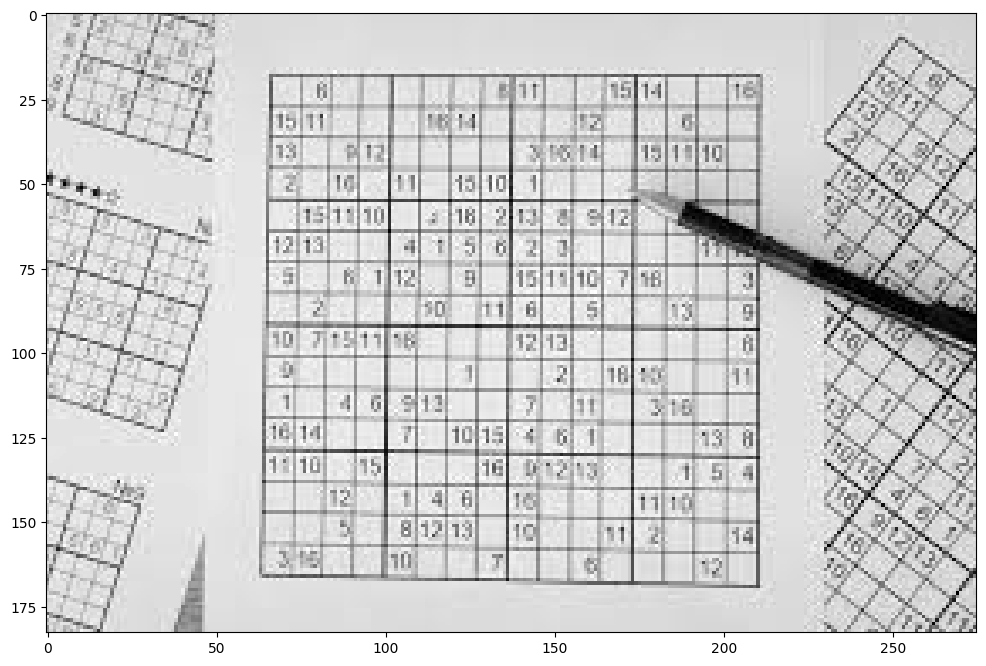

In [4]:
display_img(img)

In [5]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

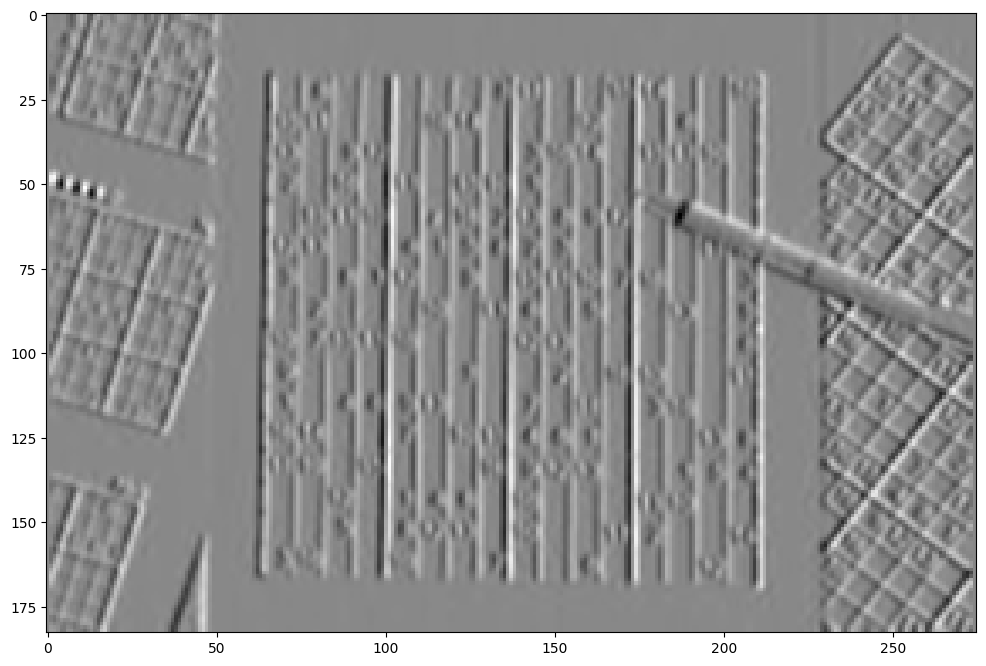

In [6]:
display_img(sobelx)

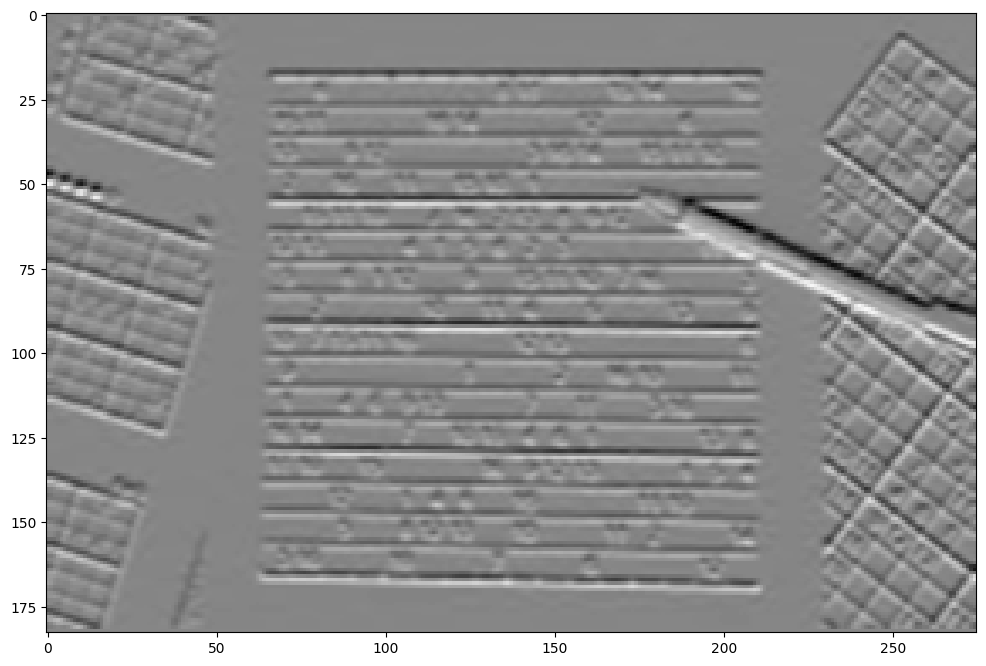

In [7]:
display_img(sobely)

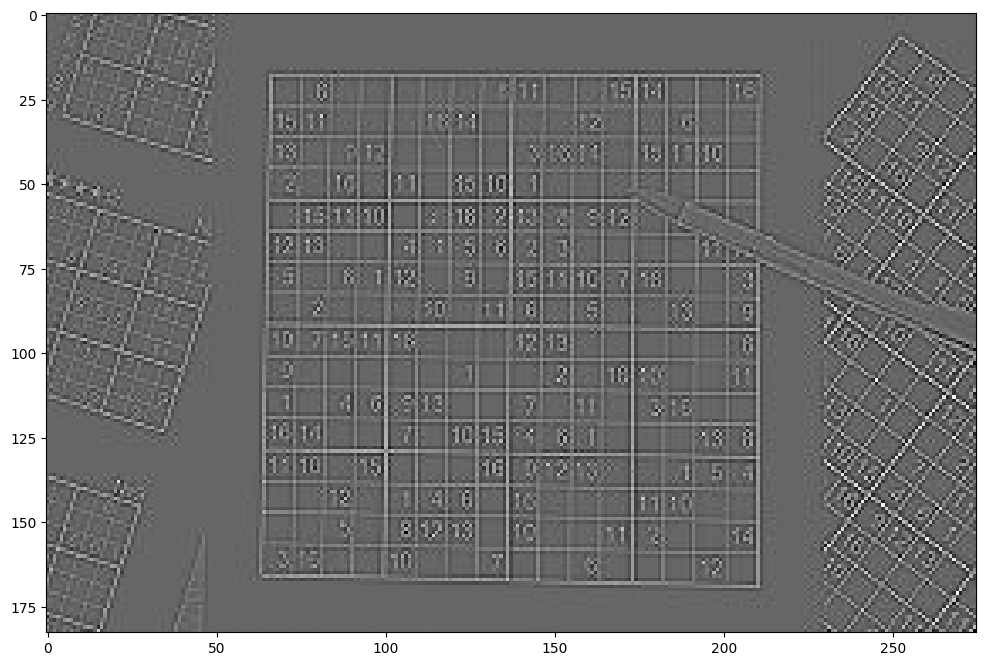

In [8]:
display_img(laplacian)

Combining Previous Ideas 

Blending Images 

In [9]:
blended = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5, gamma=0)

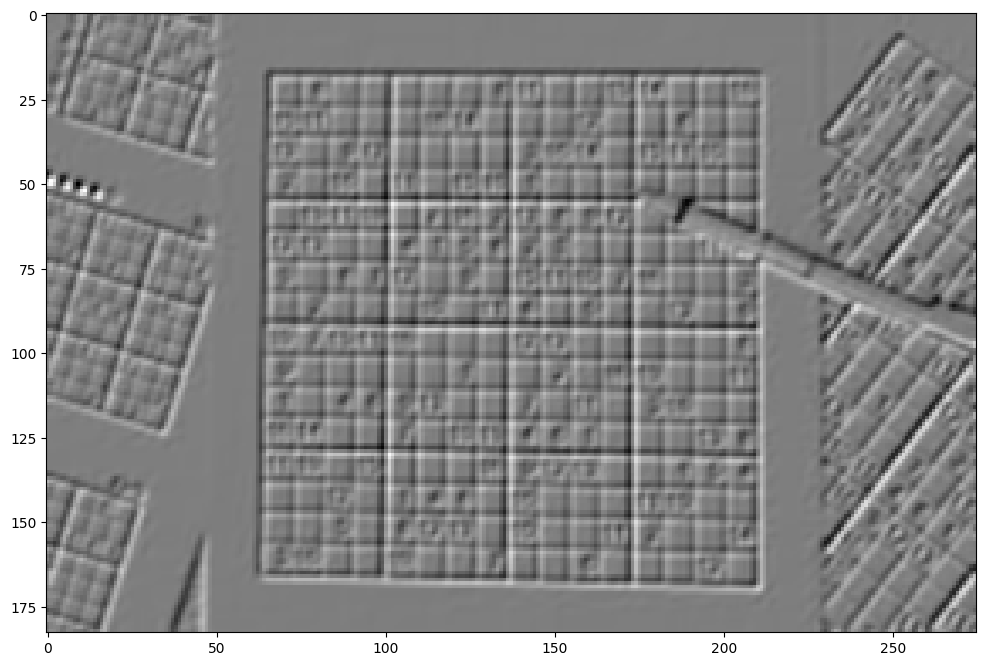

In [10]:
display_img(blended)

In [11]:
blended.shape

(183, 275)

Morphological Operator 

In [12]:
kernel = np.ones((4,4), np.uint8)
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)

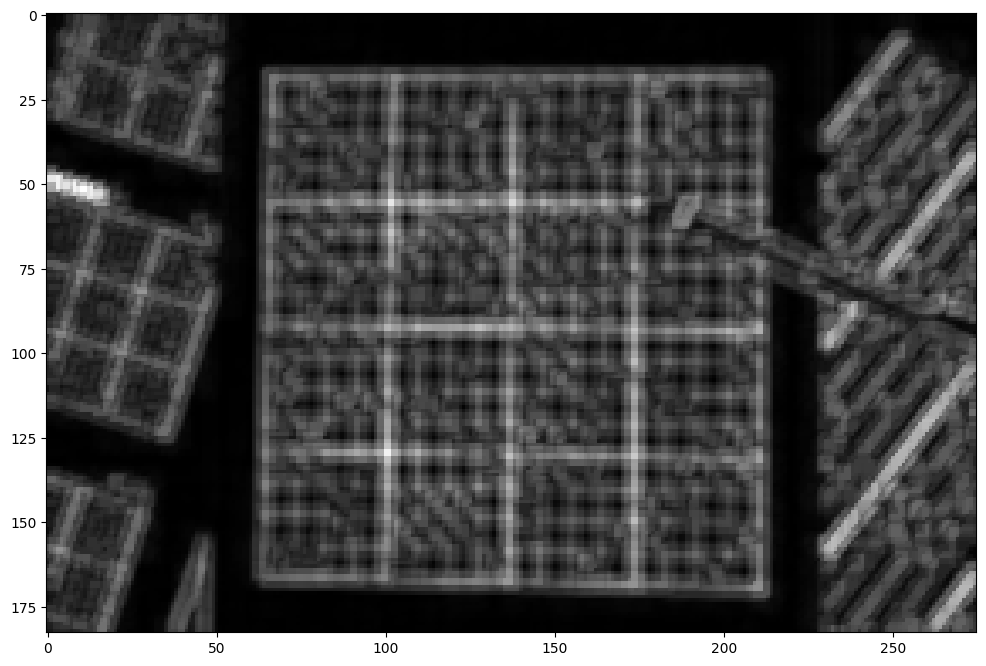

In [13]:
display_img(gradient)

In [14]:
# Try it on laplacian result
kernel = np.ones((3,3), np.uint8)
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)

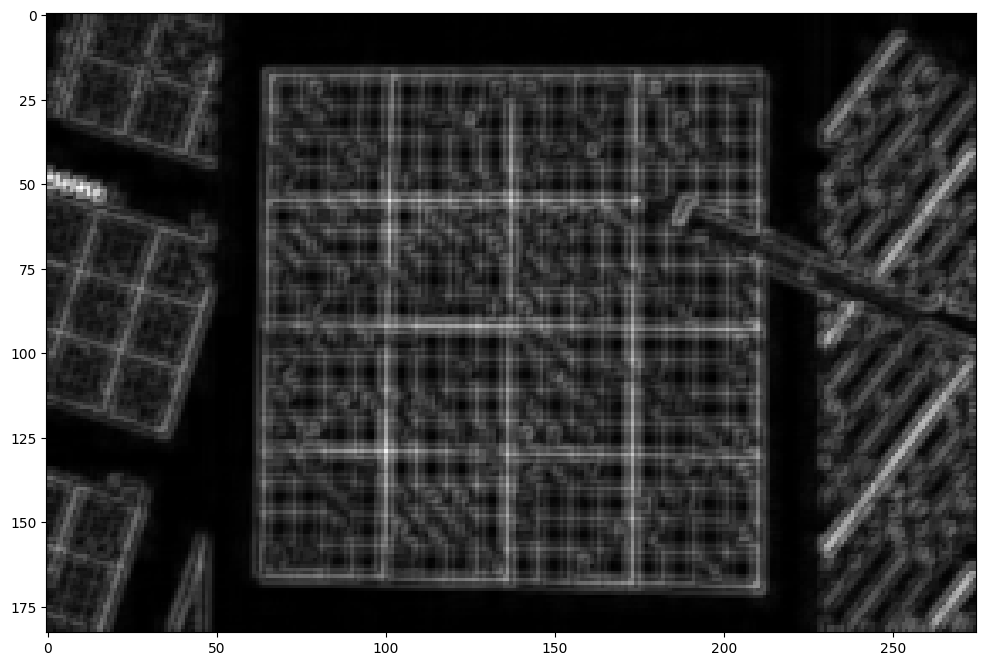

In [15]:
display_img(gradient)

Threshold

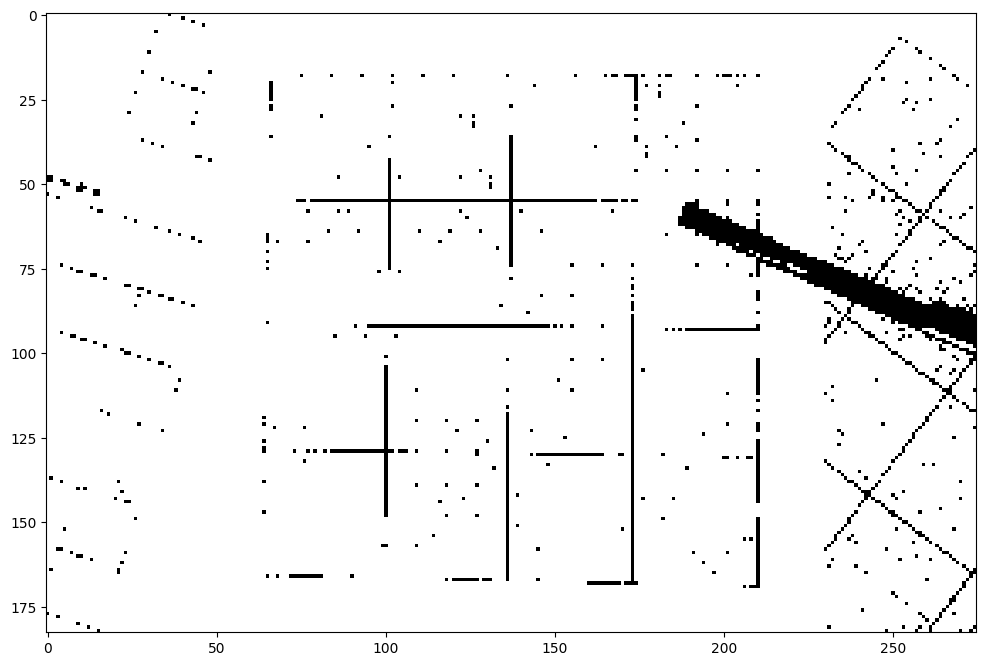

In [16]:
ret , th1 = cv2.threshold(img,100, 255, cv2.THRESH_BINARY)
display_img(th1)

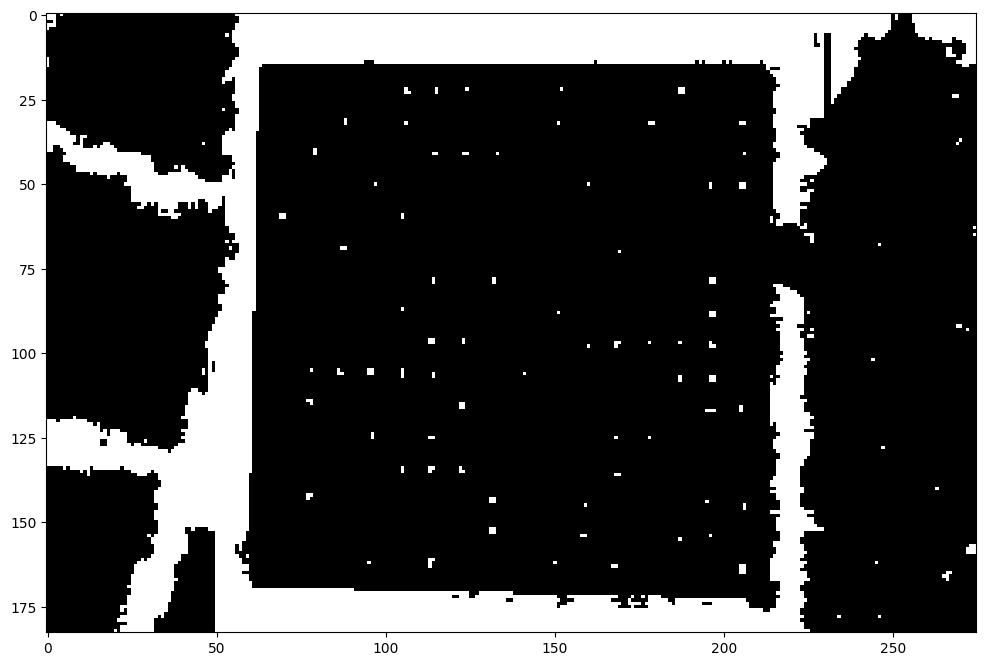

In [17]:
ret, th1 = cv2.threshold(gradient,200, 255, cv2.THRESH_BINARY_INV)
display_img(th1)

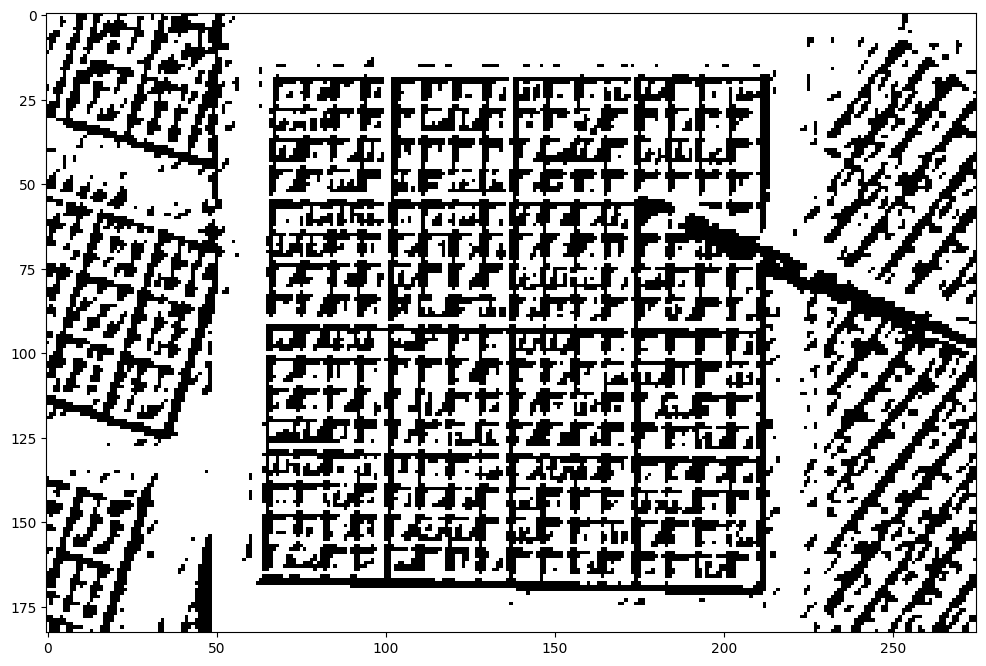

In [18]:
ret, th1 = cv2.threshold(blended, 100, 255, cv2.THRESH_BINARY_INV)
display_img(th1)

In [19]:
# Done